In [1]:
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from scipy.signal import dlsim
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('dark_background')

In [2]:
from os.path import abspath
from os import chdir

In [3]:
chdir(abspath('../'))

In [4]:
from Utilities.Correlation import Correlation as Corr

In [5]:
N = 1000
wn = np.random.normal(loc=0, scale=1, size=N)

In [6]:
ar_coeffs = [1,0.5]
ma_coeffs = [1,0]

system = (ma_coeffs, ar_coeffs, 1)
_, y = dlsim(system, wn)
y = y[:, 0]

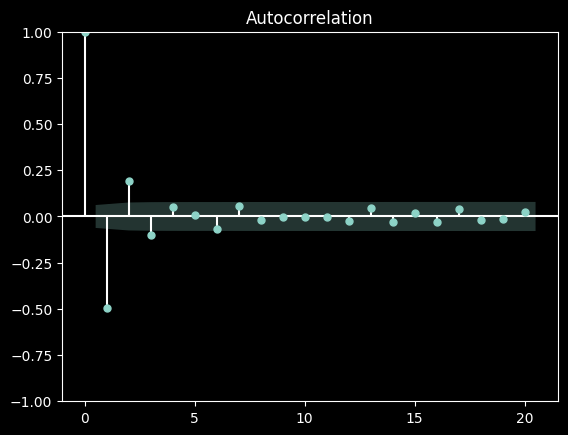

In [7]:
plot_acf(y, lags=20)
plt.show()

/home/rajkumarcm/venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


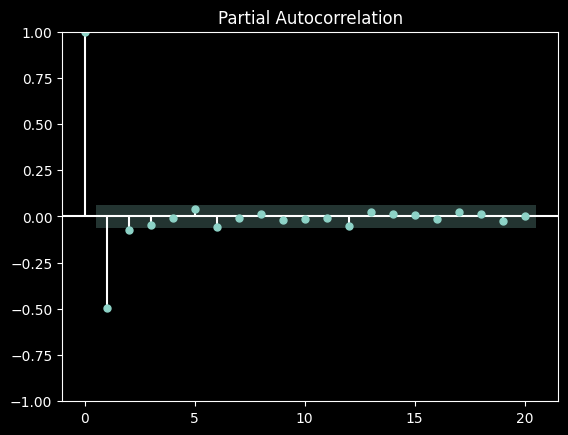

In [8]:
plot_pacf(y, lags=20)
plt.show()

In [9]:
help(ARMA)

Help on class ARMA in module statsmodels.tsa.arima_model:

class ARMA(builtins.object)
 |  ARMA(*args, **kwargs)
 |  
 |  ARMA has been deprecated in favor of the new implementation
 |  
 |  See Also
 |  --------
 |  statsmodels.tsa.arima.model.ARIMA
 |      ARIMA models with a variety of parameter estimators
 |  statsmodels.tsa.statespace.SARIMAX
 |      SARIMAX models estimated using MLE
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [10]:
model_fit = sm.tsa.ARIMA(y, order=(1,0,0), trend='n').fit()

In [11]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1402.491
Date:                Mon, 19 Dec 2022   AIC                           2808.982
Time:                        08:33:36   BIC                           2818.797
Sample:                             0   HQIC                          2812.712
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4944      0.028    -17.598      0.000      -0.549      -0.439
sigma2         0.9674      0.044     21.899      0.000       0.881       1.054
===================================================================================
Ljung-Box (L1) (Q):                   1.31   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.25   Prob(JB):                         0.71
Heteroskedasticity (H):               1.05   Skew:                            -0.05
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
y_hat = model_fit.predict(start=0, end=N-1)

In [13]:
len(y_hat)

1000

In [14]:
len(y)

1000

In [16]:
len(y_hat)

1000

In [17]:
e = y-y_hat

In [18]:
corr = Corr()

In [19]:
lags = 40

In [20]:
e_acf, _ = corr.acf(e, max_lag=lags, plot=False, return_acf=True)

In [21]:
Q = len(y) * (e_acf[1:].T @ e_acf[1:])

In [22]:
Q

39.09872238415876

In [23]:
deg_of_freed = lags - 1

In [24]:
from scipy.stats import chi2

In [25]:
chi2.ppf(1-0.05, deg_of_freed)

54.572227758941736

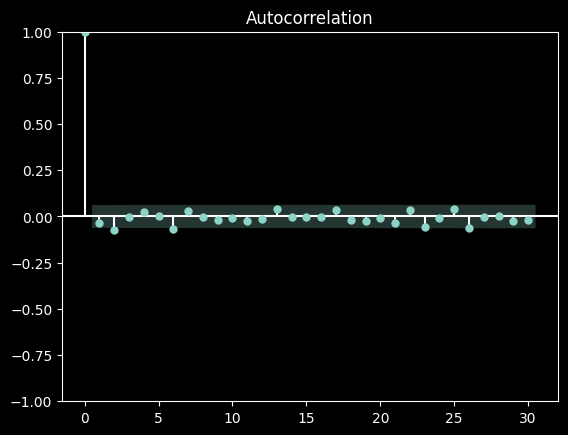

In [26]:
plot_acf(e)
plt.show()

Why doing subtraction on accurate time would not allow you to verify whether the residuals are white

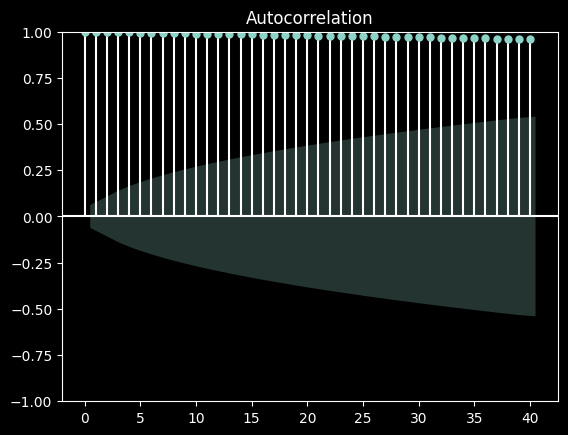

In [68]:
plot_acf(np.zeros([1000])+0.1, lags=40)
plt.show()